# Question 2 - Predict whether a person has Diabetes

The diabetes dataset has some features which help deduce if a person has diabetes or not. The colums are:  
**Glucose: Glucose concentration in a oral test within 2 hours  
Insulin: Insulin levels within 2 hours  
Age: Age of person  
Outcome: 0 (No Diabetes) or 1(Diabetes)**

## Task:
Predict whether a person has diabetes using two features of the three given. 

## Questions
1. Are there any missing rows or incorrect values in the dataset? Justify. If yes, remove them.
2. How does Glucose and Insulin vary for Diabetics and Non Diabetics at the age of 25?
3. At what age is a person most susceptible to Diabetes?
4. Is the data given biased to you? Justify.
5. Plot a pair wise scatter plot of every feature.
6. Using Perceptron Model, with the entire dataset, find out if a person of 43 years has diabetes based on a Glucose level of 114 and 0 Insulin level? Also plot the separation using the meshgrid approach.
7. If you use an unbiased fitting method, with the entire dataset, does the outcome change for the same input values as above? Also plot the separation using the meshgrid approach.
8. **Important** Predict the outcome for the entire dataset using the model created in Question 7. Get the confusion matrix. What are your comments on the Perceptron and SVM model?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Glucose,Insulin,Age,Outcome
0,85,0,31,0
1,89,94,21,0
2,116,0,30,0
3,115,0,29,0
4,110,0,30,0


In [3]:
df.isnull().sum()

Glucose    0
Insulin    0
Age        0
Outcome    0
dtype: int64

Text(0,0.5,'Insulin')

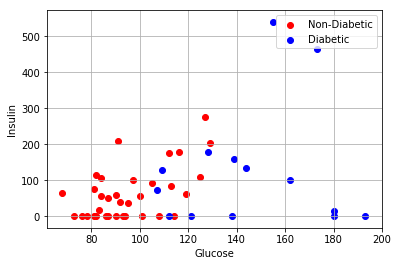

In [4]:
#How does Glucose and Insulin vary for Diabetics and Non Diabetics at the age of 25?
age_25=df[df['Age']==25]
outcome_0=age_25[age_25['Outcome']==0]
outcome_1=age_25[age_25['Outcome']==1]
plt.scatter(outcome_0['Glucose'],outcome_0['Insulin'],color='r',label='Non-Diabetic')
plt.scatter(outcome_1['Glucose'],outcome_1['Insulin'],color='b',label='Diabetic')
plt.legend()
plt.grid()
plt.xlabel('Glucose')
plt.ylabel('Insulin')

In [5]:
#At what age is a person most susceptible to Diabetes?
l=[]
m=df[df['Outcome']==1]
grouped_data=m.groupby(['Age'])
for name,group in grouped_data:
    l.append(group['Age'].count())
m=max(l)
for name,group in grouped_data:
    if(group['Age'].count()==m):
        print('age at which diabetes is most susceptible:',name)


age at which diabetes is most susceptible: 25


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

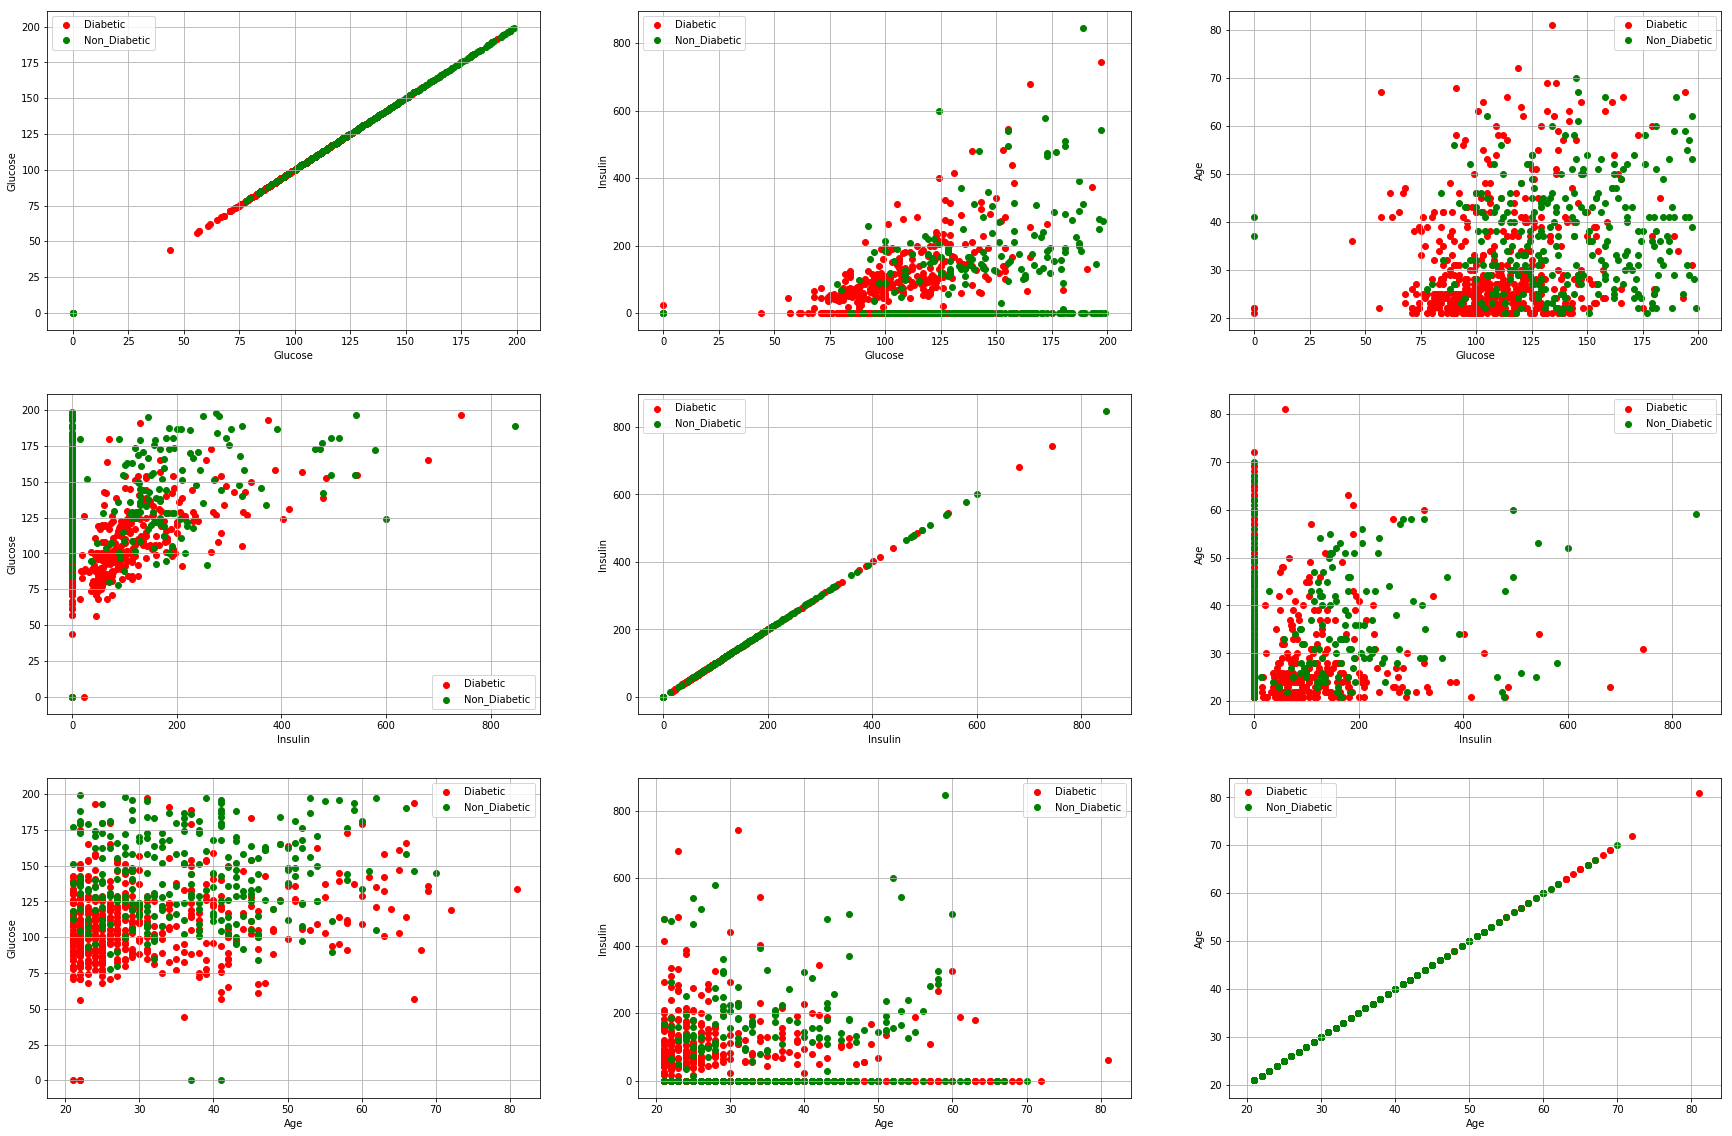

In [7]:
#Plot a pair wise scatter plot of every feature.
plt.figure(figsize=(30,20)) 
non_dia=df[df['Outcome']==0]
dia=df[df['Outcome']==1]
a=1
for i in range(0,3):
    for j in range(0,3):
        plt.subplot(3,3,a)
        a=a+1    
        plt.scatter(non_dia[df.columns[i]],non_dia[df.columns[j]],color='r',label='Diabetic')
        plt.scatter(dia[df.columns[i]],dia[df.columns[j]],color='g',label='Non_Diabetic')
        plt.legend()
        plt.grid()
        plt.ylabel(df.columns[j])
        plt.xlabel(df.columns[i])


In [8]:
#Using Perceptron Model, with the entire dataset, find out if a person of 43 years has diabetes based on a Glucose level of 114 and 0 Insulin level? Also plot the separation using the meshgrid approach.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=\
train_test_split(df[['Age','Glucose']],df['Outcome'],test_size=0.2,random_state=3)


In [9]:
from sklearn.linear_model import Perceptron

classifier=Perceptron(max_iter=1000)
model=classifier.fit(df[['Age','Glucose','Insulin']],df['Outcome'])
print(model.predict([[43,114,0]]))

[0]


In [10]:
import numpy as np
diab=df[df['Outcome']==1]
ndiab=df[df['Outcome']==0]
x_min,x_max=0,90#minimum x/y is 0 and maximum x/y is1
y_min,y_max=0,210

xx,yy=np.meshgrid(np.arange(x_min,x_max, .01),np.arange(y_min,y_max, .01))

xx_lin=xx.ravel()
yy_lin=yy.ravel()
pred_input=np.c_[xx_lin,yy_lin]
z=model.predict(pred_input)
z=z.reshape(xx.shape)

#contour plot requires 2 dimensional matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
#input to contourf is 3 ie xx ,yy and z(where to plot true and where to plot false),cmap is from matplotlib it has 2 colours in pastel1 0for hagih value color and 1 for low valued color

plt.scatter(daib['Age'],diab['Glucose'],color='b',label='Diabetic')
plt.scatter(ndiab['Age'],ndiab['Glucose'],color='r',label='non_diabetic')

plt.axis()
plt.grid()

ValueError: X has 2 features per sample; expecting 3